In [2]:
import pandas as pd
import numpy as np
import scipy as sp

import mlutils
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import SVC

import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
#load the data
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<Figure size 7200x7200 with 0 Axes>

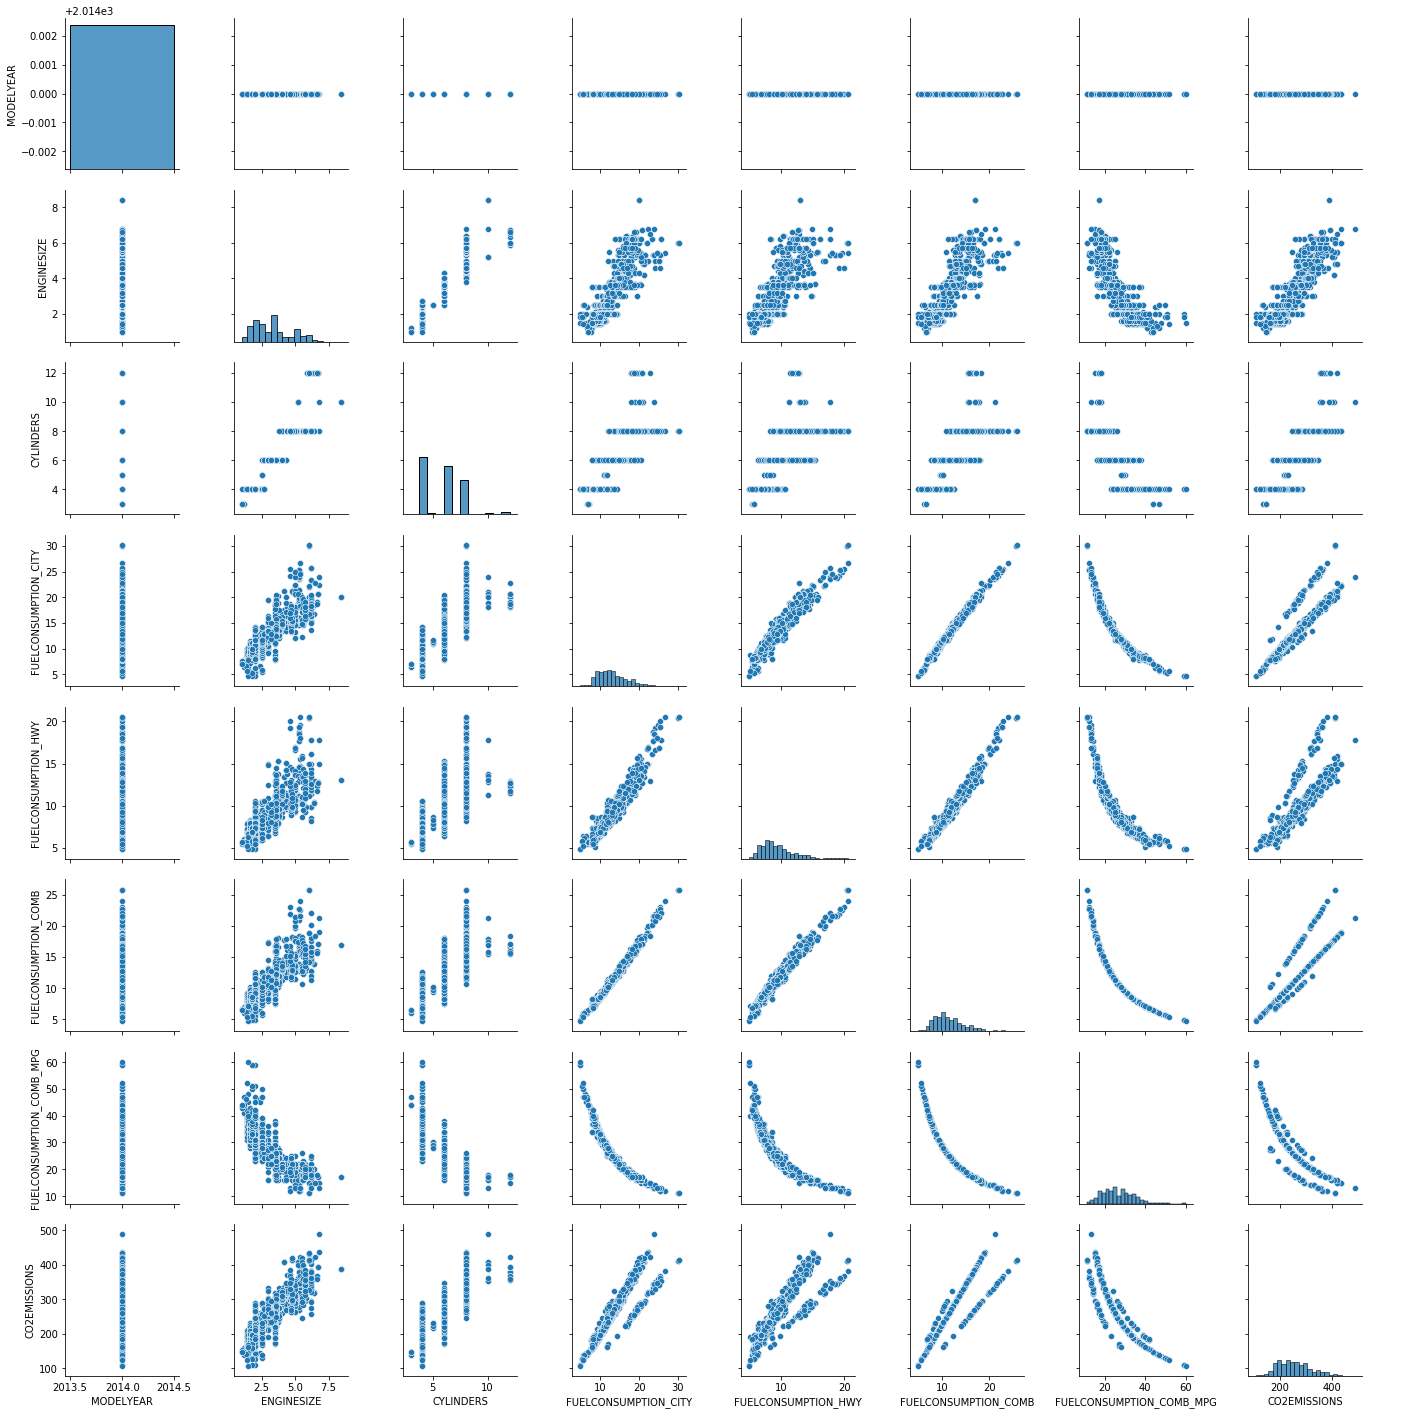

In [5]:
fig = plt.figure(figsize=(100,100))
sbn.pairplot(data=df)

# Polynomial regression

In [6]:
#in the above pairplot we can see that there are several variables that keep a non-linear relation-ship, lets 
#apply a polynomial model to the C02EMISSIONS and FUELCONSUPTION_COMB_MPG

#The first step is to choose the feactures and the targets
#For the polinomial features we need to get all their possible powers 
#For instance, for an unique feature X with a 3-degree polynomial we need X⁰, X¹, X² and X³
#Then each of this new "features" can be used to fit a linear model

### 2-degree polynomial 

In [7]:
#feature
X = df[["FUELCONSUMPTION_COMB_MPG"]]

#target
y = df[["CO2EMISSIONS"]]

#But we want to apply a polynomial model, lets say a 2-degree polynomial y=aX²+bX+c
#for this we need not only X but X² too, to get it lets use polinomialFeatures
#this one give us all the possible power combinations for the polynomial X⁰, X¹, X²...
#For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a², ab, b²] (Taken from DOC)
#X⁰=1 is the bias of the polynomial and we can turn it off with include_bias=False
pol2 = PolynomialFeatures(degree=2, include_bias=False)
X    = pol2.fit_transform(X)
X

array([[  33., 1089.],
       [  29.,  841.],
       [  48., 2304.],
       ...,
       [  24.,  576.],
       [  25.,  625.],
       [  22.,  484.]])

In [8]:
#train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#now lets apply a linear model to the new features X¹ and X²
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

#coefficients and intercept
print(40*"#")
print("coefficients:", lr.coef_)
print("Intercept:   ", lr.intercept_)

(853, 2) (214, 2)
(853, 1) (214, 1)
########################################
coefficients: [[-15.21713053   0.1309869 ]]
Intercept:    [559.9124231]


In [9]:
#metrics
y_pred = lr.predict(X=X_test)
y_pred_= lr.predict(X=X_train)
print("R2 (train):", metrics.r2_score(y_true=y_train, y_pred=y_pred_))
print("R2 (test) :", metrics.r2_score(y_true=y_test,  y_pred=y_pred))
print("MAE:       ", metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("RMSE:      ", metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test)**0.5)

R2 (train): 0.8536747051791967
R2 (test) : 0.844566793371623
MAE:        13.152514322946361
RMSE:       3.6266395358439416


### n-degree polynomial 

In [10]:
def npolynomial_regression(n):
    #feature
    X = df[["FUELCONSUMPTION_COMB_MPG"]]

    #target
    y = df[["CO2EMISSIONS"]]

    #polynomial X1, X², X³
    poln = PolynomialFeatures(degree=n, include_bias=False)
    Xn   = poln.fit_transform(X)
    Xn
    
    
    #training and testing sets
    Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, y, random_state=23, test_size=0.2)
    print(40*"#")
    print("Training and testing sets shape")
    print(Xn_train.shape, Xn_test.shape)
    print(yn_train.shape, yn_test.shape)

    #linear model
    lrn = LinearRegression()
    lrn.fit(X=Xn_train, y=yn_train)

    ##coefficients and intercept
    print(" ")
    print(40*"#")
    [print("X%i = %.5f"%(i+1, coef)) for i,coef in enumerate(lrn.coef_[0])]
    print("Intercept:   ", lrn.intercept_[0])
    
    #metrics
    #using lrn.score() is the same as metrics.r2_score()
    #metrics.r2_score(y_true=yn_train, y_pred=lrn.predict(X=Xn_train)) is the same as lrn.score(X=Xn_train, y=yn_train)
    yn_pred = lrn.predict(X=Xn_test)
    print(" ")
    print(40*"#")
    print("metrics:")
    print("R2 (train):", lrn.score(X=Xn_train, y=yn_train))
    print("R2 (test): ", lrn.score(X=Xn_test,  y=yn_test))
    print("MAE:       ", metrics.mean_absolute_error(y_pred=yn_pred, y_true=yn_test))
    print("RMSE:      ", metrics.mean_absolute_error(y_pred=yn_pred, y_true=yn_test)**0.5)

In [11]:
npolynomial_regression(2)

########################################
Training and testing sets shape
(853, 2) (214, 2)
(853, 1) (214, 1)
 
########################################
X1 = -15.21713
X2 = 0.13099
Intercept:    559.9124231030926
 
########################################
metrics:
R2 (train): 0.8536747051791967
R2 (test):  0.844566793371623
MAE:        13.152514322946361
RMSE:       3.6266395358439416


In [12]:
npolynomial_regression(4)

########################################
Training and testing sets shape
(853, 4) (214, 4)
(853, 1) (214, 1)
 
########################################
X1 = 21.88491
X2 = -1.73976
X3 = 0.03902
X4 = -0.00028
Intercept:    304.3662633356207
 
########################################
metrics:
R2 (train): 0.8594155229822538
R2 (test):  0.8556986937779538
MAE:        11.405904892118047
RMSE:       3.377262929077043


In [13]:
npolynomial_regression(6)

########################################
Training and testing sets shape
(853, 6) (214, 6)
(853, 1) (214, 1)
 
########################################
X1 = -2.36419
X2 = 1.64295
X3 = -0.16849
X4 = 0.00601
X5 = -0.00009
X6 = 0.00000
Intercept:    352.85431520596796
 
########################################
metrics:
R2 (train): 0.8612835726674521
R2 (test):  0.8582959830888222
MAE:        10.905287548594083
RMSE:       3.3023154828989436


In [14]:
npolynomial_regression(8)

########################################
Training and testing sets shape
(853, 8) (214, 8)
(853, 1) (214, 1)
 
########################################
X1 = -0.12712
X2 = -0.98416
X3 = 0.19983
X4 = -0.01792
X5 = 0.00076
X6 = -0.00002
X7 = 0.00000
X8 = -0.00000
Intercept:    396.85596209790765
 
########################################
metrics:
R2 (train): 0.8614480079749167
R2 (test):  0.8594526122587326
MAE:        10.803052382593737
RMSE:       3.2867997174445747


In [15]:
npolynomial_regression(10)

########################################
Training and testing sets shape
(853, 10) (214, 10)
(853, 1) (214, 1)
 
########################################
X1 = 0.00000
X2 = 0.00003
X3 = 0.00033
X4 = 0.00190
X5 = -0.00043
X6 = 0.00003
X7 = -0.00000
X8 = 0.00000
X9 = -0.00000
X10 = 0.00000
Intercept:    380.1853495735511
 
########################################
metrics:
R2 (train): 0.8614431092338547
R2 (test):  0.859506494082791
MAE:        10.758735197592864
RMSE:       3.2800510967960337


In [16]:
npolynomial_regression(14)

########################################
Training and testing sets shape
(853, 14) (214, 14)
(853, 1) (214, 1)
 
########################################
X1 = -0.00000
X2 = -0.00000
X3 = -0.00000
X4 = -0.00000
X5 = -0.00000
X6 = -0.00000
X7 = -0.00000
X8 = -0.00000
X9 = 0.00000
X10 = -0.00000
X11 = 0.00000
X12 = -0.00000
X13 = 0.00000
X14 = -0.00000
Intercept:    367.30146962938375
 
########################################
metrics:
R2 (train): 0.8597713759052139
R2 (test):  0.8639868624026776
MAE:        10.41242381050829
RMSE:       3.2268287544442593


# Exponential/Sigmoid models

In [17]:
#When we want  to fit a non-linear or non-polinomical model to our data we can use scipy curvefit

In [18]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


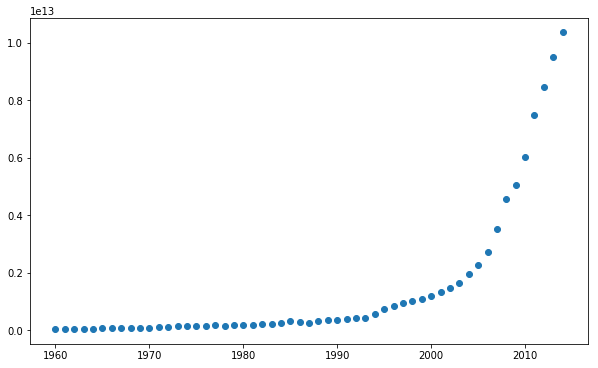

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=df.Year, y=df.Value)

In [72]:
#we see that for this data it may be a better idea to fit a non-linear/polinomical model, maybe an exponential model may work better
#exp function
def exp(x, a, b, c):
    return a+np.exp(b*x+c)

#normalizing the data
xs = (df.Year.values/df.Year.max())
ys = (df.Value.values/df.Value.max())

#splitting into training and testing sets
X_traincf, X_testcf, y_traincf, y_testcf = train_test_split(xs, ys, random_state=43, test_size=0.2)
print(X_traincf.shape, X_testcf.shape)
print(y_traincf.shape, y_testcf.shape)

#training with curvefit
popt_exp, pcov_exp = sp.optimize.curve_fit(f=exp, xdata=X_traincf, ydata=y_traincf, maxfev=10000)
print(popt_exp)

#predictions
y_predcf = exp(X_testcf, *popt_exp) 

(44,) (11,)
(44,) (11,)
[ 9.30100886e-03  3.20568730e+02 -3.20517007e+02]


In [73]:
#metrics
print("R2:  ", metrics.r2_score(y_pred=y_predcf, y_true=y_testcf))
print("MAE: ", metrics.mean_absolute_error(y_pred=y_predcf, y_true=y_testcf) )
print("RMSE:", metrics.mean_absolute_error(y_pred=y_predcf, y_true=y_testcf)**0.5)

R2:   0.954570008417795
MAE:  0.005302651871162496
RMSE: 0.07281930974104668


In [74]:
#Now let's try with a sigmoid model

In [76]:
def sigmoid(x, b1, b2):
    return 1/(1+np.exp(-b1*(x-b2)))

#training the model
popt_sig, pcov_sig = sp.optimize.curve_fit(f=sigmoid, xdata=X_traincf, ydata=y_traincf)
print(popt_sig)

#predictions
y_predcf_sig = sigmoid(X_testcf, *popt_sig)

[715.9438369    0.99722739]


In [78]:
#metrics
print("R2:  ", metrics.r2_score(y_pred=y_predcf_sig, y_true=y_testcf))
print("MAE: ", metrics.mean_absolute_error(y_pred=y_predcf_sig, y_true=y_testcf) )
print("RMSE:", metrics.mean_absolute_error(y_pred=y_predcf_sig, y_true=y_testcf)**0.5)

R2:   0.6494831829978593
MAE:  0.02511245466560746
RMSE: 0.15846909687887875


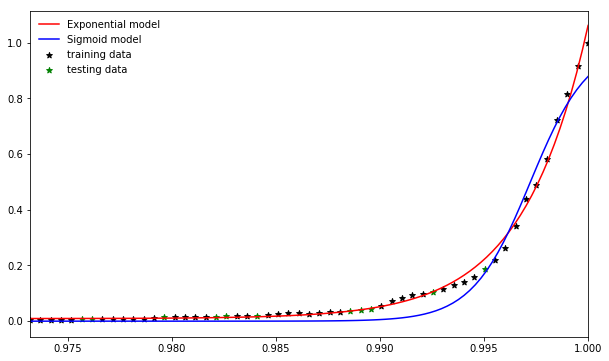

In [109]:
#We see that the esponential model seems to make better prediccions than the sigmoid model
#And so, we can do several non-linear/polinomical fits by using curvefit. 
xss = np.linspace(min(xs), max(xs),100)
plt.figure(figsize=(10,6))
plt.scatter(x=X_traincf, y=y_traincf, label="training data", color="black", marker="*")
plt.scatter(x=X_testcf, y=y_testcf, label="testing data", color="green", marker="*")
plt.plot(xss, exp(xss, *popt_exp), "red", label="Exponential model")
plt.plot(xss, sigmoid(xss, *popt_sig), "blue", label="Sigmoid model")
plt.xlim(min(xs), max(xs))
plt.legend(fancybox=True, frameon=False)